In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
# Todos as data bases separadas
dados_00 = pd.read_csv('Base_de_dados/dataset-of-00s.csv')
dados_10 = pd.read_csv('Base_de_dados/dataset-of-10s.csv')
dados_60 = pd.read_csv('Base_de_dados/dataset-of-60s.csv')
dados_70 = pd.read_csv('Base_de_dados/dataset-of-70s.csv')
dados_80 = pd.read_csv('Base_de_dados/dataset-of-80s.csv')
dados_90 = pd.read_csv('Base_de_dados/dataset-of-90s.csv')
dados_00

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.4710,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.8540,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.8360,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.9940,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.7640,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,0.667,0.6270,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,232560,4,40.87045,10,1
5868,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,0.691,0.3890,6,-10.125,1,0.0653,0.255000,0.000000,0.0981,0.437,122.219,233840,4,81.77735,7,1
5869,"Mass in B minor BWV 232, Missa: Duetto - Chris...",Johann Sebastian Bach,spotify:track:4NIOi1ImMfdufRTsgoKjbD,0.297,0.0773,2,-23.839,1,0.0620,0.951000,0.000217,0.1210,0.401,75.916,275560,4,37.51903,11,0
5870,Loog,The Clean,spotify:track:2Qyj2nUdm8y37TCCzDasFn,0.390,0.6010,7,-8.236,0,0.0291,0.031300,0.947000,0.1190,0.439,116.122,223627,4,39.84092,11,0


In [4]:
# Juntando todas em uma só
todos = [dados_60, dados_70, dados_80, dados_90, dados_00, dados_10]
dados_juntos = pd.concat(todos, keys=['60s:', '70s:', '80s:', '90s:', '00s:', '10s:'])
dados_juntos

track            artist  \
60s: 0     Jealous Kind Of Fella     Garland Green   
     1             Initials B.B.  Serge Gainsbourg   
     2              Melody Twist       Lord Melody   
     3             Mi Bomba Sonó        Celia Cruz   
     4               Uravu Solla       P. Susheela   
...                          ...               ...   
10s: 6393          Lotus Flowers             Yolta   
     6394      Calling My Spirit       Kodak Black   
     6395          Teenage Dream        Katy Perry   
     6396         Stormy Weather    Oscar Peterson   
     6397                   Dust       Hans Zimmer   

                                            uri  danceability  energy  key  \
60s: 0     spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3   
     1     spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   
     2     spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   
     3     spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   
     4     spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11   
...                                         ...           ...     ...  ...   
10s: 6393  spotify:track:4t1TljQWJ6ZuoSY67zVvBI         0.172   0.358    9   
     6394  spotify:track:2MShy1GSSgbmGUxADNIao5         0.910   0.366    1   
     6395  spotify:track:55qBw1900pZKfXJ6Q9A2Lc         0.719   0.804   10   
     6396  spotify:track:4o9npmYHrOF1rUxxTVH8h4         0.600   0.177    7   
     6397  spotify:track:2khIaVUkbMmDHB596lyMG3         0.121   0.123    4   

           loudness  mode  speechiness  acousticness  instrumentalness  \
60s: 0       -7.727     1       0.0403        0.4900          0.000000   
     1      -12.475     1       0.0337        0.0180          0.107000   
     2      -13.392     1       0.0380        0.8460          0.000004   
     3      -12.058     0       0.1040        0.7060          0.024600   
     4       -3.515     0       0.1240        0.8570          0.000872   
...             ...   ...          ...           ...               ...   
10s: 6393   -14.430     1       0.0342        0.8860          0.966000   
     6394    -9.954     1       0.0941        0.0996          0.000000   
     6395    -4.581     1       0.0355        0.0132          0.000003   
     6396   -16.070     1       0.0561        0.9890          0.868000   
     6397   -23.025     0       0.0443        0.9640          0.696000   

           liveness  valence    tempo  duration_ms  time_signature  \
60s: 0       0.0779   0.8450  185.655       173533               3   
     1       0.1760   0.7970  101.801       213613               4   
     2       0.1190   0.9080  115.940       223960               4   
     3       0.0610   0.9670  105.592       157907               4   
     4       0.2130   0.9060  114.617       245600               4   
...             ...      ...      ...          ...             ...   
10s: 6393    0.3140   0.0361   72.272       150857               4   
     6394    0.2610   0.7400  119.985       152000               4   
     6395    0.1390   0.6050  119.999       227760               4   
     6396    0.1490   0.5600  120.030       213387               4   
     6397    0.1030   0.0297   95.182       341396               4   

           chorus_hit  sections  target  
60s: 0       32.94975         9       1  
     1       48.82510        10       0  
     2       37.22663        12       0  
     3       24.75484         8       0  
     4       21.79874        14       0  
...               ...       ...     ...  
10s: 6393    24.30824         7       0  
     6394    32.53856         8       1  
     6395    20.73371         7       1  
     6396    21.65301        14       0  
     6397    71.05343        15       0  

[41106 rows x 19 columns]

______
# Análise exploratória inicial.

In [5]:
# Teste para instrumentalness
faixas = pd.cut(dados_juntos.instrumentalness, bins=10)
pd.crosstab(dados_juntos.target, faixas, normalize='columns', margins=True)*100

instrumentalness,"(-0.001, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]","(0.9, 1.0]",All
target,,,,,,,,,,,
0,38.754753,71.552555,76.246334,78.009631,79.712747,86.15917,86.723164,90.008764,93.522626,95.77823,50.0
1,61.245247,28.447445,23.753666,21.990369,20.287253,13.84083,13.276836,9.991236,6.477374,4.22177,50.0


### Gráficos de influência para cada uma das variáveis

## Acousticness:

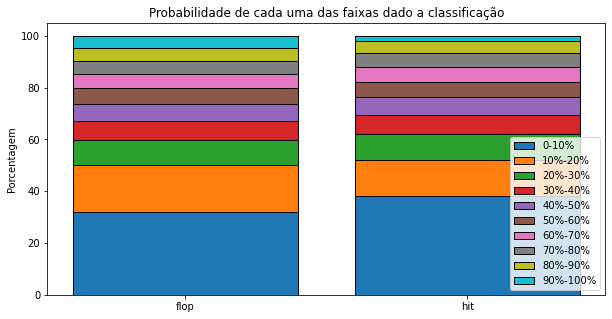

In [28]:
faixa_hit = pd.cut(dados_juntos.loc[dados_juntos.target == 1,].acousticness, bins=10)
faixa_flop = pd.cut(dados_juntos.loc[dados_juntos.target == 0,].acousticness, bins=10) 
valores_hit = faixa_hit.value_counts(True)
valores_flop = faixa_flop.value_counts(True)
y2 = np.array([valores_hit[i]*100 for i in range(-10, 0, 1)])
y1 = np.array([valores_flop[i]*100 for i in range(-10, 0, 1)])
bottom_y1, bottom_y2 = 0, 0
fig = plt.figure(figsize=(10, 5))
for i in range(0, 10):
    plt.bar(['flop', 'hit'], [y1[i], y2[i]], bottom=[bottom_y1, bottom_y2], edgecolor='black')
    bottom_y1 += y1[i]
    bottom_y2 += y2[i]
plt.legend(['0-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%'])    
plt.ylabel('Porcentagem')
plt.title('Probabilidade de cada uma das faixas dado a classificação')
plt.show()

## speechiness

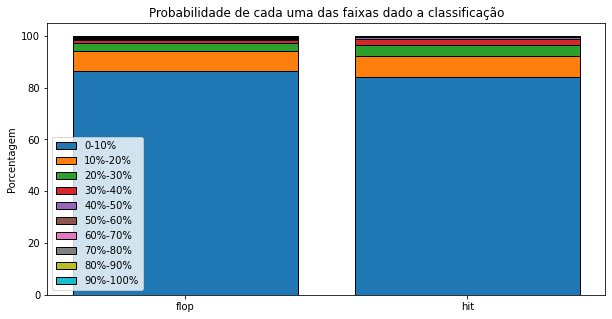

In [27]:
faixa_hit = pd.cut(dados_juntos.loc[dados_juntos.target == 1,].speechiness, bins=10)
faixa_flop = pd.cut(dados_juntos.loc[dados_juntos.target == 0,].speechiness, bins=10)
# Em probabilidade de aparencia
valores_hit = faixa_hit.value_counts(True)
valores_flop = faixa_flop.value_counts(True)
y2 = np.array([valores_hit[i]*100 for i in range(-10, 0, 1)])
y1 = np.array([valores_flop[i]*100 for i in range(-10, 0, 1)])
bottom_y1, bottom_y2 = 0, 0
fig = plt.figure(figsize=(10, 5))
for i in range(0, 10):
    plt.bar(['flop', 'hit'], [y1[i], y2[i]], bottom=[bottom_y1, bottom_y2], edgecolor='black')
    bottom_y1 += y1[i]
    bottom_y2 += y2[i]
plt.legend(['0-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%'])    
plt.ylabel('Porcentagem')
plt.title('Probabilidade de cada uma das faixas dado a classificação')
plt.show()

## Energy:

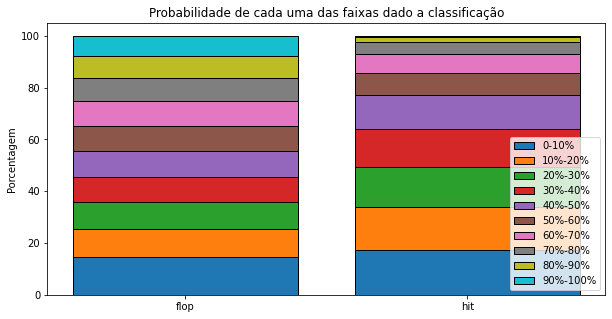

In [26]:
faixa_hit = pd.cut(dados_juntos.loc[dados_juntos.target == 1,].energy, bins=10)
faixa_flop = pd.cut(dados_juntos.loc[dados_juntos.target == 0,].energy, bins=10)
# Em probabilidade de aparencia
valores_hit = faixa_hit.value_counts(True)
valores_flop = faixa_flop.value_counts(True)
y2 = np.array([valores_hit[i]*100 for i in range(-10, 0, 1)])
y1 = np.array([valores_flop[i]*100 for i in range(-10, 0, 1)])
bottom_y1, bottom_y2 = 0, 0
fig = plt.figure(figsize=(10, 5))
for i in range(0, 10):
    plt.bar(['flop', 'hit'], [y1[i], y2[i]], bottom=[bottom_y1, bottom_y2], edgecolor='black')
    bottom_y1 += y1[i]
    bottom_y2 += y2[i]
plt.legend(['0-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%'])    
plt.ylabel('Porcentagem')
plt.title('Probabilidade de cada uma das faixas dado a classificação')
plt.show()

## instrumentalness:

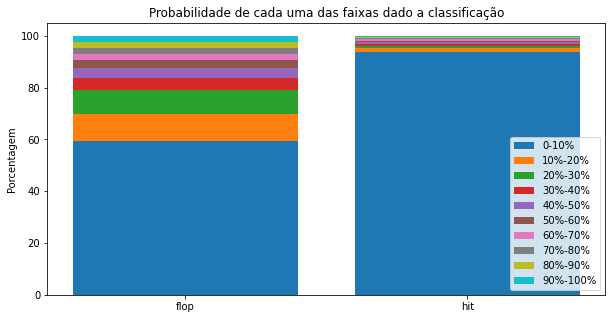

In [25]:
faixa_hit = pd.cut(dados_juntos.loc[dados_juntos.target == 1,].instrumentalness, bins=10)
faixa_flop = pd.cut(dados_juntos.loc[dados_juntos.target == 0,].instrumentalness, bins=10)
# Em probabilidade de aparencia
valores_hit = faixa_hit.value_counts(True)
valores_flop = faixa_flop.value_counts(True)
y2 = np.array([valores_hit[i]*100 for i in range(-10, 0, 1)])
y1 = np.array([valores_flop[i]*100 for i in range(-10, 0, 1)])
bottom_y1, bottom_y2 = 0, 0
fig = plt.figure(figsize=(10, 5))
for i in range(0, 10):
    plt.bar(['flop', 'hit'], [y1[i], y2[i]], bottom=[bottom_y1, bottom_y2])
    bottom_y1 += y1[i]
    bottom_y2 += y2[i]
plt.legend(['0-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%'])
plt.ylabel('Porcentagem')
plt.title('Probabilidade de cada uma das faixas dado a classificação')
plt.show()

## danceability

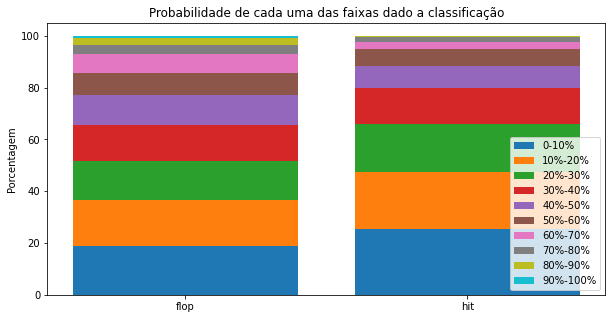

In [24]:
faixa_hit = pd.cut(dados_juntos.loc[dados_juntos.target == 1,].danceability, bins=10)
faixa_flop = pd.cut(dados_juntos.loc[dados_juntos.target == 0,].danceability, bins=10)
# Em probabilidade de aparencia
valores_hit = faixa_hit.value_counts(True)
valores_flop = faixa_flop.value_counts(True)
y2 = np.array([valores_hit[i]*100 for i in range(-10, 0, 1)])
y1 = np.array([valores_flop[i]*100 for i in range(-10, 0, 1)])
bottom_y1, bottom_y2 = 0, 0
fig = plt.figure(figsize=(10, 5))
for i in range(0, 10):
    plt.bar(['flop', 'hit'], [y1[i], y2[i]], bottom=[bottom_y1, bottom_y2])
    bottom_y1 += y1[i]
    bottom_y2 += y2[i]
plt.legend(['0-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%'])
plt.ylabel('Porcentagem')
plt.title('Probabilidade de cada uma das faixas dado a classificação')
plt.show()

## loudness:

In [13]:
faixas = pd.cut(dados_juntos.loudness, bins=10)
pd.crosstab(dados_juntos.target, faixas, normalize='columns', margins=True)*100

loudness,"(-49.306, -43.953]","(-43.953, -38.654]","(-38.654, -33.354]","(-33.354, -28.054]","(-28.054, -22.754]","(-22.754, -17.455]","(-17.455, -12.155]","(-12.155, -6.855]","(-6.855, -1.556]","(-1.556, 3.744]",All
target,,,,,,,,,,,
0,100.0,100.0,100.0,100.0,96.182266,88.62069,59.624132,44.124013,39.12971,60.759494,50.0
1,0.0,0.0,0.0,0.0,3.817734,11.37931,40.375868,55.875987,60.87029,39.240506,50.0


## liveness:

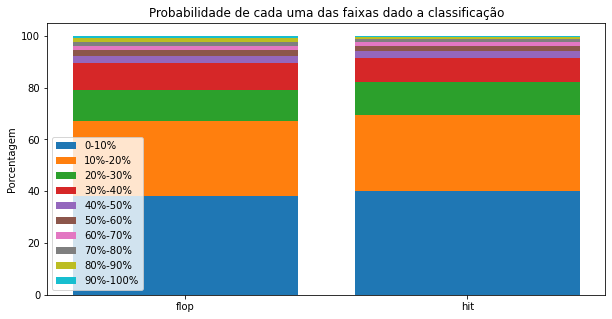

In [22]:
faixa_hit = pd.cut(dados_juntos.loc[dados_juntos.target == 1,].liveness, bins=10)
faixa_flop = pd.cut(dados_juntos.loc[dados_juntos.target == 0,].liveness, bins=10)
# Em probabilidade de aparencia
valores_hit = faixa_hit.value_counts(True)
valores_flop = faixa_flop.value_counts(True)
y2 = np.array([valores_hit[i]*100 for i in range(-10, 0, 1)])
y1 = np.array([valores_flop[i]*100 for i in range(-10, 0, 1)])
bottom_y1, bottom_y2 = 0, 0
fig = plt.figure(figsize=(10, 5))
for i in range(0, 10):
    plt.bar(['flop', 'hit'], [y1[i], y2[i]], bottom=[bottom_y1, bottom_y2])
    bottom_y1 += y1[i]
    bottom_y2 += y2[i]
plt.legend(['0-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%'])
plt.ylabel('Porcentagem')
plt.title('Probabilidade de cada uma das faixas dado a classificação')
plt.show()

## valence:

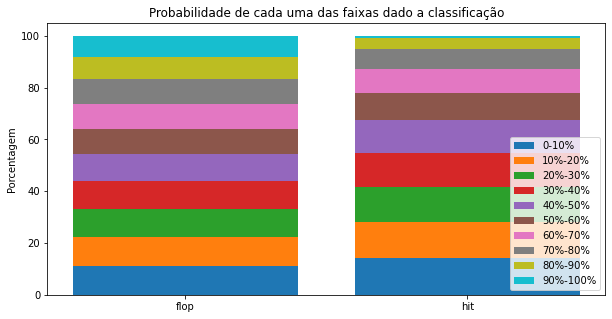

In [21]:
faixa_hit = pd.cut(dados_juntos.loc[dados_juntos.target == 1,].valence, bins=10)
faixa_flop = pd.cut(dados_juntos.loc[dados_juntos.target == 0,].valence, bins=10)
# Em probabilidade de aparencia
valores_hit = faixa_hit.value_counts(True)
valores_flop = faixa_flop.value_counts(True)
y2 = np.array([valores_hit[i]*100 for i in range(-10, 0, 1)])
y1 = np.array([valores_flop[i]*100 for i in range(-10, 0, 1)])
bottom_y1, bottom_y2 = 0, 0
fig = plt.figure(figsize=(10, 5))
for i in range(0, 10):
    plt.bar(['flop', 'hit'], [y1[i], y2[i]], bottom=[bottom_y1, bottom_y2])
    bottom_y1 += y1[i]
    bottom_y2 += y2[i]
plt.legend(['0-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%'])
plt.ylabel('Porcentagem')
plt.title('Probabilidade de cada uma das faixas dado a classificação')
plt.show()

## tempo:

In [16]:
faixas = pd.cut(dados_juntos.tempo, bins=10)
pd.crosstab(dados_juntos.target, faixas, normalize='columns', margins=True)*100

tempo,"(-0.241, 24.142]","(24.142, 48.285]","(48.285, 72.427]","(72.427, 96.569]","(96.569, 120.712]","(120.712, 144.854]","(144.854, 168.996]","(168.996, 193.138]","(193.138, 217.281]","(217.281, 241.423]",All
target,,,,,,,,,,,
0,0.0,96.551724,74.646465,53.695255,47.474352,46.531228,50.685579,54.255733,48.717949,50.0,50.0
1,100.0,3.448276,25.353535,46.304745,52.525648,53.468772,49.314421,45.744267,51.282051,50.0,50.0


## chorus_hit:

In [19]:
faixas = pd.cut(dados_juntos.chorus_hit, bins=10)
pd.crosstab(dados_juntos.target, faixas, normalize='columns', margins=True)*100

chorus_hit,"(-0.433, 43.318]","(43.318, 86.636]","(86.636, 129.955]","(129.955, 173.273]","(173.273, 216.591]","(216.591, 259.909]","(259.909, 303.227]","(389.864, 433.182]",All
target,,,,,,,,,
0,48.329188,52.688787,60.93591,65.486726,80.0,83.333333,0.0,100.0,50.0
1,51.670812,47.311213,39.06409,34.513274,20.0,16.666667,100.0,0.0,50.0


## Sections:

In [44]:
sidaoj = np.arange(1, 40, 3.5)
faixas = pd.cut(dados_juntos.sections, bins=sidaoj)
pd.crosstab(dados_juntos.target, faixas, normalize='columns', margins=True)*100

sections,"(1.0, 4.5]","(4.5, 8.0]","(8.0, 11.5]","(11.5, 15.0]","(15.0, 18.5]","(18.5, 22.0]","(22.0, 25.5]","(25.5, 29.0]","(29.0, 32.5]","(32.5, 36.0]","(36.0, 39.5]",All
target,,,,,,,,,,,,
0,90.569395,52.802626,41.58918,46.398586,63.752784,79.900125,90.361446,92.349727,96.551724,92.1875,96.296296,49.810731
1,9.430605,47.197374,58.41082,53.601414,36.247216,20.099875,9.638554,7.650273,3.448276,7.8125,3.703704,50.189269
